In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn import datasets

## Análise descritiva 1D

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/refs/heads/main/Marks.csv')
df.head()

,Maths_Marks,English_Marks,History_Marks
0,67.970442,60.990250,72.200954
1,58.438226,64.157607,62.687182
2,82.354172,62.998874,50.171015
3,72.909983,64.255032,62.686110
4,81.140560,64.819401,57.546319


In [3]:
X = df.to_numpy()

In [4]:
def descritive(x):
    # Cálculo de medidas descritivas
    minimum = np.min(x)
    maximum = x.max()
    ran = x.max() - x.min()
    mean = x.mean()
    median = np.median(x)
    std = x.std()
    skew = st.skew(x)
    kurt = st.kurtosis(x)

    # plotar histograma
    sns.histplot(x, kde = True)
    
    sns.lineplot(x=[mean - std, mean + std], y=[0, 0], color = 'black', label = "std")
    sns.scatterplot(x = [minimum, maximum], y = [0, 0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'blue', label = "median")
    
    plt.ylabel('density')
    
    #print(f"desvio-padrão: {round(mean - std, 2)} {round(mean + std, 2)}")
    print(f"desvio-padrão: {round(std, 2)}")
    print(f"curtose: {round(kurt, 2)}") 
    print(f"assimetria: {round(skew, 2)}") 
    print(f"range: {round(minimum, 2), round(maximum, 2), round(ran, 2)}") 
    print(f"média: {round(mean, 2)}") 
    print(f"mediana: {round(median, 2)}")

desvio-padrão: 8.45
curtose: -0.45
assimetria: -0.18
range: (50.59, 89.63, 39.04)
média: 70.26
mediana: 70.28


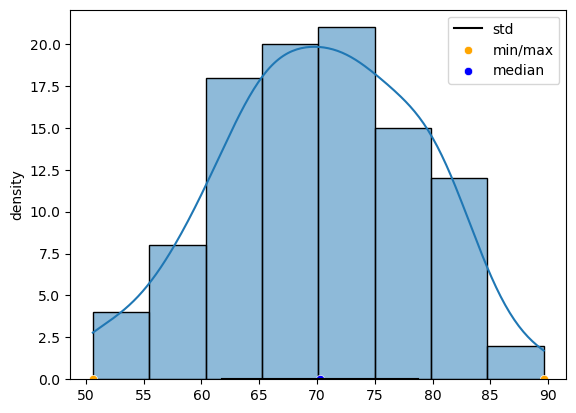

In [5]:
descritive(X[:,0])

desvio-padrão: 1.8
curtose: -0.04
assimetria: 0.84
range: (60.16, 67.83, 7.67)
média: 62.56
mediana: 62.17


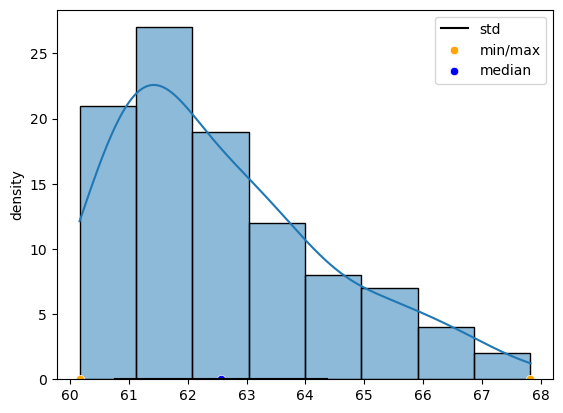

In [6]:
descritive(X[:,1])

desvio-padrão: 17.27
curtose: 0.81
assimetria: -0.97
range: (4.59, 86.83, 82.24)
média: 62.31
mediana: 64.67


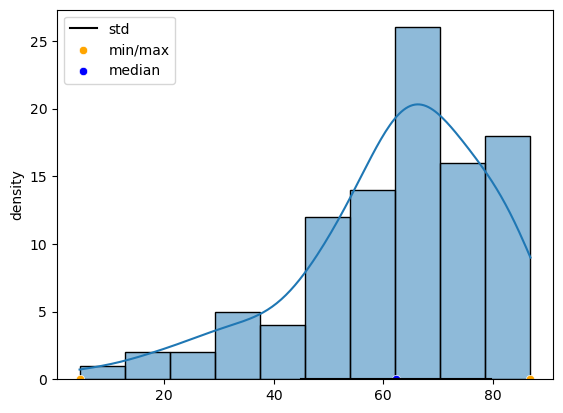

In [7]:
descritive(X[:,2])

## Distribuição normal univariada

A distribuição normal, também conhecida como **distribuição gaussiana**, pois se baseia na função gaussiana. Essa distribuição é definida por dois parâmetros: a **média** $\mu$, que é o **valor esperado da distribuição**, e o **desvio padrão** $\sigma$, que corresponde ao **desvio esperado da média**. O quadrado do desvio padrão é normalmente chamado de **variância** $\sigma^2$. Denotamos essa distribuição como:

\begin{equation}
$\mathcal{N}=(\mu,\sigma)$
\end{equation}

Dada a média e a variância referentes a um conjunto de dados, podemos calcular a **função de densidade de probabilidade** (**pdf** -- probility densitiy function) da distribuição normal com a função gaussiana normalizada. Para um valor $x$, a densidade é:

\begin{equation}
p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}
\end{equation}

In [8]:
def univariate_pdf(x, mean, std):
    """pdf de uma distribuição normal univariada."""
    return ((1. / np.sqrt(2 * np.pi * std**2)) * np.exp(-(x - mean)**2 / (2 * std**2)))

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5810/198274391.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, univariate_pdf(x, mean = 0, std = 1), label = "$\mathcal{N}(0, 1)$")


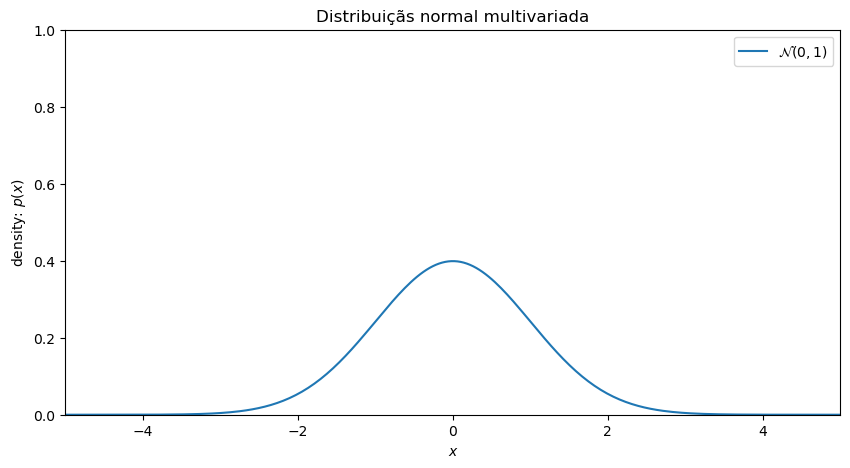

In [9]:
x = np.linspace(-5, 5, num = 250)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, univariate_pdf(x, mean = 0, std = 1), label = "$\mathcal{N}(0, 1)$")
plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.title('Distribuiçãs normal multivariada')
plt.ylim([0, 1])
plt.xlim([-5, 5])
plt.legend(loc = 1)

plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5810/771956572.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, univariate_pdf(x, mean = 0, std = 2), label = "$\mathcal{N}(0, 2)$")
/tmp/ipykernel_5810/771956572.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, univariate_pdf(x, mean = 0, std = 0.5), lab

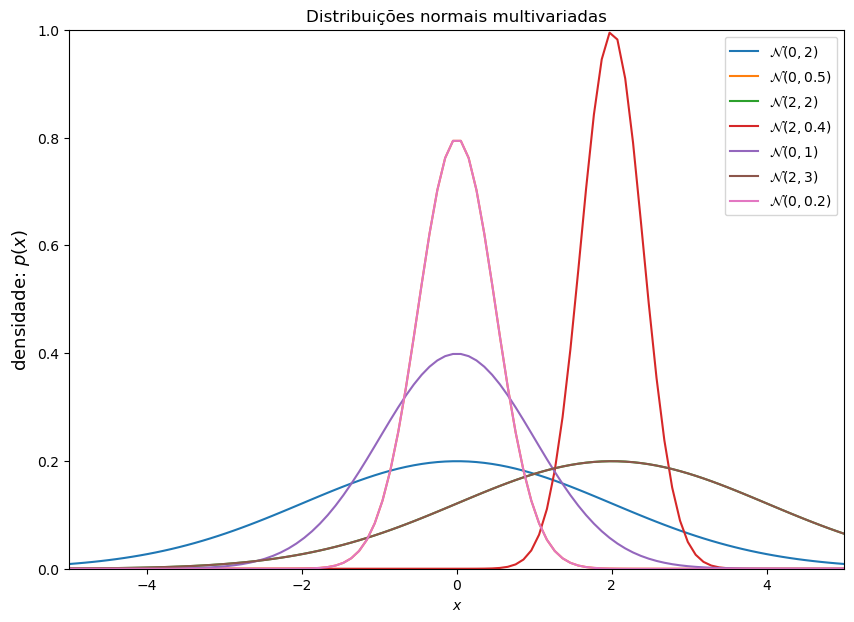

In [10]:
x = np.linspace(-5, 5, num = 100)
fig = plt.figure(figsize=(10, 7))
plt.plot(x, univariate_pdf(x, mean = 0, std = 2), label = "$\mathcal{N}(0, 2)$")
plt.plot(x, univariate_pdf(x, mean = 0, std = 0.5), label = "$\mathcal{N}(0, 0.5)$")
plt.plot(x, univariate_pdf(x, mean = 2, std = 2), label = "$\mathcal{N}(2, 2)$")
plt.plot(x, univariate_pdf(x, mean = 2, std = 0.4), label = "$\mathcal{N}(2, 0.4)$")
plt.plot(x, st.norm.pdf(x, loc = 0, scale = 1),label="$\mathcal{N}(0, 1)$")
plt.plot(x, st.norm.pdf(x, loc = 2, scale = 2),label="$\mathcal{N}(2, 3)$")
plt.plot(x, st.norm.pdf(x, loc = 0, scale = 0.5),label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$')
plt.ylabel('densidade: $p(x)$', fontsize=13)
plt.title('Distribuições normais multivariadas')
plt.ylim([0, 1])
plt.xlim([-5, 5])
plt.legend(loc = 1)

plt.show()

## Análise descritiva ND

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

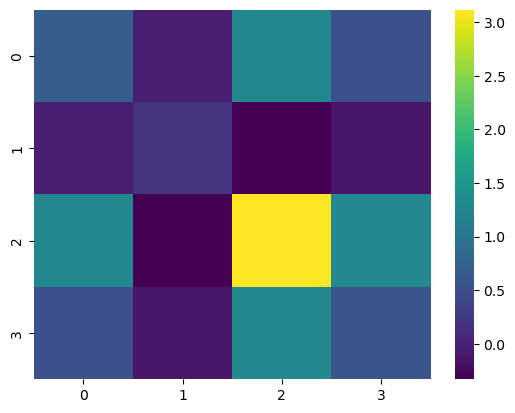

In [12]:
cov = np.cov(X.T)
sns.heatmap(cov, cmap='viridis')
cov

## Distribuição Gaussiana multivariada

A distribuição normal multivariada é uma **generalização multidimensional** da distribuição normal unidimensional. Ela representa a distribuição de uma variável aleatória multivariada composta por **múltiplas variáveis aleatórias** que podem ser correlacionadas entre si.

Assim como a distribuição normal univariada, a multivariada é definida por conjuntos de parâmetros: o **vetor de médias** $\mu$, que é o valor esperado da distribuição; e a **matriz de covariância** $\Sigma$, que mede o quão dependentes são duas variáveis aleatórias e como elas variam juntas.

A distribuição normal multivariada com dimensionalidade $d$ tem uma densidade de probabilidade conjunta dada por:

\begin{equation}
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
\end{equation}

Onde $\mathbf{x}$ é um vetor aleatório de tamanho $d$, $\mathbf{\mu}$ é o vetor da média, $\mathbf{\Sigma}$ é a matriz de covariância (simétrica, definida positiva) (de tamanho $d \times d$, e $|\Sigma|$ seu determinante. Denotamos essa distribuição normal multivariada como:

\begin{equation}
\mathcal{N}(\mathbf{\mu}, \Sigma)
\end{equation}

In [13]:
def multivariate_pdf(X, Y, d, mean, covariance):
    # Empacote X e Y em uma única matriz tridimensional
    pos = np.dstack([X, Y])
    
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    
    fac = np.einsum('...k,kl,...l->...', pos - mu, Sigma_inv, pos - mu)

    return np.exp(-fac / 2) / N

Exemplo para duas distribuições normais bivariadas são plotadas abaixo.

À esquerda é a distribuição bivariada com a covariância entre as variáveis $x_1$ e $x_2$ definida como $0$ para que essas 2 variáveis sejam independentes:

\begin{equation}
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)
\end{equation}

In [14]:
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Vetor de médias e matriz de covariância
mu = np.array([0., 0])
Sigma = np.array([[ 1., 0], [0,  1]])

Z = multivariate_pdf(X, Y, 2, mu, Sigma)

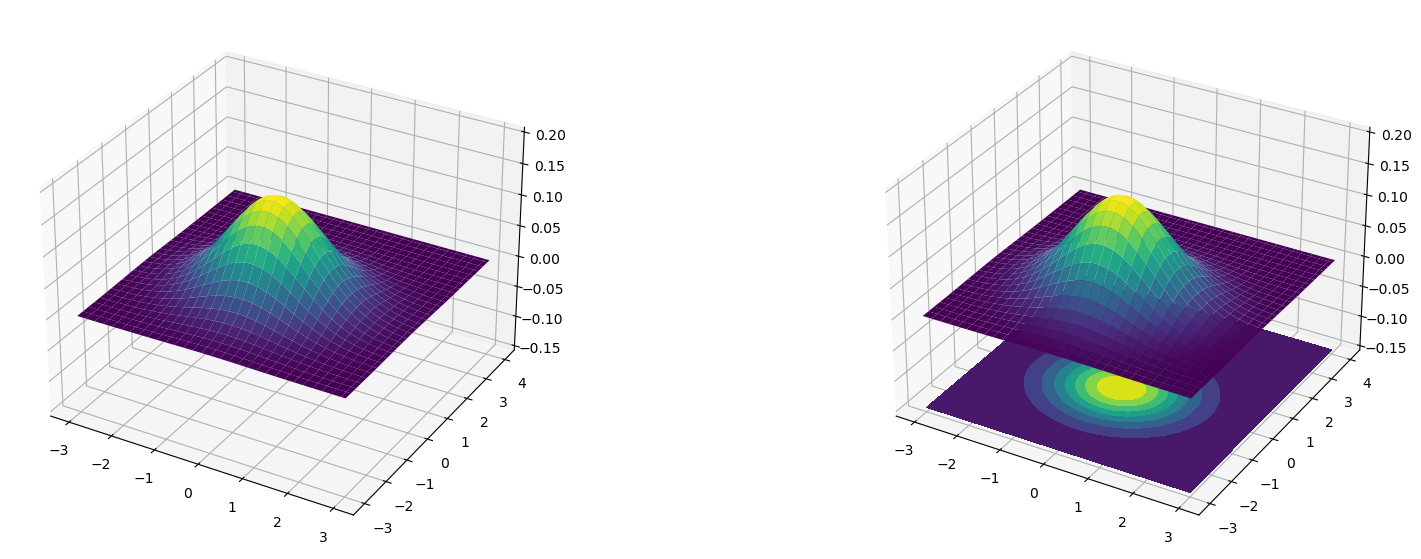

In [15]:
fig = plt.figure(figsize = (20, 7))

# Figura 1
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')

ax.set_zlim(-0.15, 0.2)

# Figura 2
ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')
cset = ax.contourf(X, Y, Z, zdir = 'z', offset = -0.15, cmap = 'viridis')

ax.set_zlim(-0.15, 0.2)

plt.show()

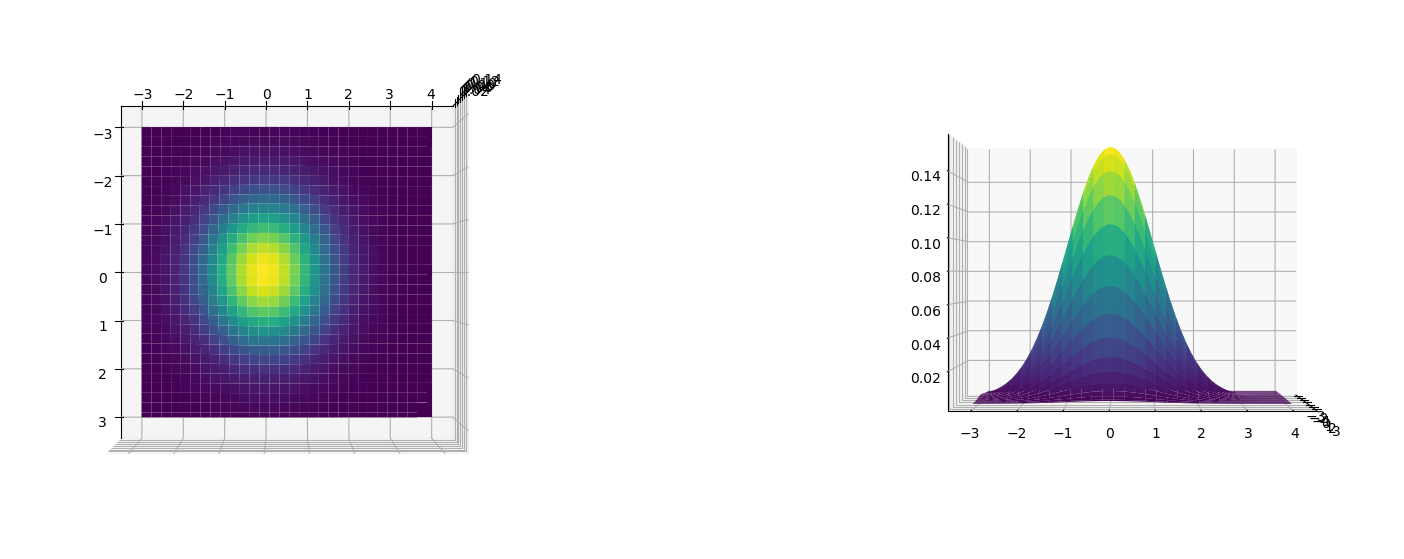

In [16]:
fig = plt.figure(figsize=(20, 7))

# Figura 1
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')

ax.view_init(90, 0)

# Figura 2
ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')

ax.view_init(0, 0)

plt.show()